In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [3]:
import pickle
with open('./data/melted_zip1.pickle', 'rb') as file:
    melted_zip1 = pickle.load(file)
    

# ARIMA Modeling

In [4]:
melted_zip1.head()

,value
time,
1996-04-01,58900.0
1996-05-01,59000.0
1996-06-01,59200.0
1996-07-01,59300.0
1996-08-01,59400.0


In [5]:
ts1 = melted_zip1['2010-01-01':]
ts1

,value
time,
2010-01-01,74300.0
2010-02-01,74700.0
2010-03-01,73300.0
2010-04-01,70200.0
2010-05-01,68600.0
...,...
2017-12-01,97000.0
2018-01-01,97900.0
2018-02-01,98800.0


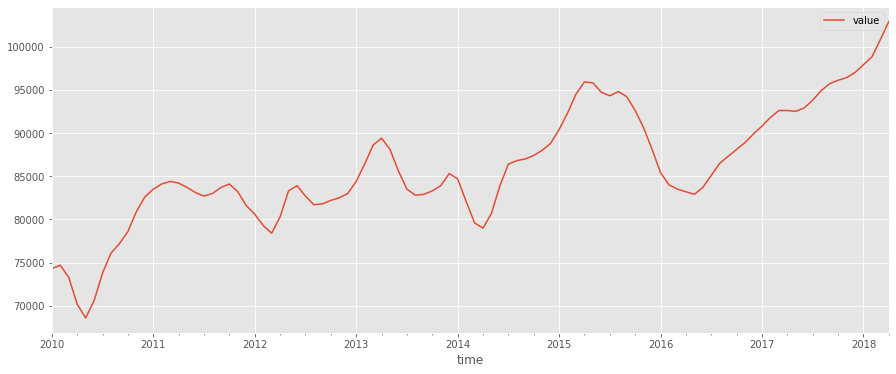

              value
time               
2010-01-01  74300.0
2010-02-01  74700.0
2010-03-01  73300.0
2010-04-01  70200.0
2010-05-01  68600.0


In [6]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [7]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(ts1['value'])

# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

# print(dftest)

# print ('Results of Dickey-Fuller test: \n')

# print(dfoutput)

In [8]:
# # Difference the time series
# ts1_diff = ts1.diff().dropna()
# ts1_diff

In [9]:
# ts1_diff.plot(figsize=(15,6))
# plt.show()


In [10]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}1 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)1 : AIC Calculated =2533.389462272963
ARIMA (0, 0, 0) x (0, 0, 1, 1)1 : AIC Calculated =2439.7529928886033
ARIMA (0, 0, 0) x (0, 0, 2, 1)1 : AIC Calculated =2401.286335087888
ARIMA (0, 0, 0) x (0, 1, 0, 1)1 : AIC Calculated =1700.3036674360903
ARIMA (0, 0, 0) x (0, 1, 1, 1)1 : AIC Calculated =1586.5680502584119
ARIMA (0, 0, 0) x (0, 1, 2, 1)1 : AIC Calculated =1513.3093732576406
ARIMA (0, 0, 0) x (0, 2, 0, 1)1 : AIC Calculated =1620.4204982764725
ARIMA (0, 0, 0) x (0, 2, 1, 1)1 : AIC Calculated =1572.8217714124921
ARIMA (0, 0, 0) x (0, 2, 2, 1)1 : AIC Calculated =1532.357533163275
ARIMA (0, 0, 0) x (1, 0, 0, 1)1 : AIC Calculated =1714.450048145767
ARIMA (0, 0, 0) x (1, 0, 1, 1)1 : AIC Calculated =1604.7047557789097
ARIMA (0, 0, 0) x (1, 0, 2, 1)1 : AIC Calculated =1536.666007303423
ARIMA (0, 0, 0) x (1, 1, 0, 1)1 : AIC Calculated =1628.020085086191
ARIMA (0, 0, 0) x (1, 1, 1, 1)1 : AIC Calculated =1579.8312541193186
ARIMA (0, 0, 0) x (1, 1, 2, 1)1 : AIC Ca

ARIMA (0, 1, 1) x (1, 1, 0, 1)1 : AIC Calculated =1565.5996566255408
ARIMA (0, 1, 1) x (1, 1, 1, 1)1 : AIC Calculated =1532.8723200675952
ARIMA (0, 1, 1) x (1, 1, 2, 1)1 : AIC Calculated =1489.8072686096978
ARIMA (0, 1, 1) x (1, 2, 0, 1)1 : AIC Calculated =1581.4922742388517
ARIMA (0, 1, 1) x (1, 2, 1, 1)1 : AIC Calculated =1521.0173510871734
ARIMA (0, 1, 1) x (1, 2, 2, 1)1 : AIC Calculated =1504.1579353535717
ARIMA (0, 1, 1) x (2, 0, 0, 1)1 : AIC Calculated =1563.4421190458338
ARIMA (0, 1, 1) x (2, 0, 1, 1)1 : AIC Calculated =1524.8942414660573
ARIMA (0, 1, 1) x (2, 0, 2, 1)1 : AIC Calculated =1506.6798065035623
ARIMA (0, 1, 1) x (2, 1, 0, 1)1 : AIC Calculated =1532.5911031549372
ARIMA (0, 1, 1) x (2, 1, 1, 1)1 : AIC Calculated =1509.0370479687301
ARIMA (0, 1, 1) x (2, 1, 2, 1)1 : AIC Calculated =1485.107502166909
ARIMA (0, 1, 1) x (2, 2, 0, 1)1 : AIC Calculated =1554.1714253705416
ARIMA (0, 1, 1) x (2, 2, 1, 1)1 : AIC Calculated =1502.1306022091114
ARIMA (0, 1, 1) x (2, 2, 2, 1)1 : A

ARIMA (0, 2, 2) x (2, 2, 0, 1)1 : AIC Calculated =1540.8327965036524
ARIMA (0, 2, 2) x (2, 2, 1, 1)1 : AIC Calculated =1489.969584857126
ARIMA (0, 2, 2) x (2, 2, 2, 1)1 : AIC Calculated =1488.5998011263275
ARIMA (1, 0, 0) x (0, 0, 0, 1)1 : AIC Calculated =1714.450048145767
ARIMA (1, 0, 0) x (0, 0, 1, 1)1 : AIC Calculated =1638.5940392553982
ARIMA (1, 0, 0) x (0, 0, 2, 1)1 : AIC Calculated =1608.5008162399608
ARIMA (1, 0, 0) x (0, 1, 0, 1)1 : AIC Calculated =1628.020085086191
ARIMA (1, 0, 0) x (0, 1, 1, 1)1 : AIC Calculated =1579.4046209433589
ARIMA (1, 0, 0) x (0, 1, 2, 1)1 : AIC Calculated =1566.04524850406
ARIMA (1, 0, 0) x (0, 2, 0, 1)1 : AIC Calculated =1603.712784326271
ARIMA (1, 0, 0) x (0, 2, 1, 1)1 : AIC Calculated =1569.3454881190942
ARIMA (1, 0, 0) x (0, 2, 2, 1)1 : AIC Calculated =1520.0985381212324
ARIMA (1, 0, 0) x (1, 0, 0, 1)1 : AIC Calculated =1654.1576178910368
ARIMA (1, 0, 0) x (1, 0, 1, 1)1 : AIC Calculated =1640.0147213926664
ARIMA (1, 0, 0) x (1, 0, 2, 1)1 : AIC Ca

ARIMA (1, 1, 1) x (1, 0, 0, 1)1 : AIC Calculated =1565.0646014727606
ARIMA (1, 1, 1) x (1, 0, 1, 1)1 : AIC Calculated =1527.8428002327178
ARIMA (1, 1, 1) x (1, 0, 2, 1)1 : AIC Calculated =1498.1651142352246
ARIMA (1, 1, 1) x (1, 1, 0, 1)1 : AIC Calculated =1566.1020570408375
ARIMA (1, 1, 1) x (1, 1, 1, 1)1 : AIC Calculated =1535.9837428535973
ARIMA (1, 1, 1) x (1, 1, 2, 1)1 : AIC Calculated =1489.6163551141767
ARIMA (1, 1, 1) x (1, 2, 0, 1)1 : AIC Calculated =1582.627297259691
ARIMA (1, 1, 1) x (1, 2, 1, 1)1 : AIC Calculated =1574.0805424463917
ARIMA (1, 1, 1) x (1, 2, 2, 1)1 : AIC Calculated =1506.1401148446587
ARIMA (1, 1, 1) x (2, 0, 0, 1)1 : AIC Calculated =1525.7144883266046
ARIMA (1, 1, 1) x (2, 0, 1, 1)1 : AIC Calculated =1524.2642515834805
ARIMA (1, 1, 1) x (2, 0, 2, 1)1 : AIC Calculated =1504.0976789573713
ARIMA (1, 1, 1) x (2, 1, 0, 1)1 : AIC Calculated =1508.7058005818574
ARIMA (1, 1, 1) x (2, 1, 1, 1)1 : AIC Calculated =1507.41391209895
ARIMA (1, 1, 1) x (2, 1, 2, 1)1 : AIC

ARIMA (1, 2, 2) x (2, 1, 0, 1)1 : AIC Calculated =1504.1252698948515
ARIMA (1, 2, 2) x (2, 1, 1, 1)1 : AIC Calculated =1481.1715568455686
ARIMA (1, 2, 2) x (2, 1, 2, 1)1 : AIC Calculated =1470.6500403088987
ARIMA (1, 2, 2) x (2, 2, 0, 1)1 : AIC Calculated =1536.779793345982
ARIMA (1, 2, 2) x (2, 2, 1, 1)1 : AIC Calculated =1505.7435453919106
ARIMA (1, 2, 2) x (2, 2, 2, 1)1 : AIC Calculated =1489.8865980627477
ARIMA (2, 0, 0) x (0, 0, 0, 1)1 : AIC Calculated =1629.4030472806905
ARIMA (2, 0, 0) x (0, 0, 1, 1)1 : AIC Calculated =1602.511044733172
ARIMA (2, 0, 0) x (0, 0, 2, 1)1 : AIC Calculated =1537.0249155054998
ARIMA (2, 0, 0) x (0, 1, 0, 1)1 : AIC Calculated =1559.415872646857
ARIMA (2, 0, 0) x (0, 1, 1, 1)1 : AIC Calculated =1563.4776524007966
ARIMA (2, 0, 0) x (0, 1, 2, 1)1 : AIC Calculated =1517.4525076672812
ARIMA (2, 0, 0) x (0, 2, 0, 1)1 : AIC Calculated =1535.148904079228
ARIMA (2, 0, 0) x (0, 2, 1, 1)1 : AIC Calculated =1532.6904301375457
ARIMA (2, 0, 0) x (0, 2, 2, 1)1 : AIC 

ARIMA (2, 1, 1) x (0, 2, 1, 1)1 : AIC Calculated =1502.1306006077166
ARIMA (2, 1, 1) x (0, 2, 2, 1)1 : AIC Calculated =1485.817579148837
ARIMA (2, 1, 1) x (1, 0, 0, 1)1 : AIC Calculated =1524.566991912045
ARIMA (2, 1, 1) x (1, 0, 1, 1)1 : AIC Calculated =1524.3246943539089
ARIMA (2, 1, 1) x (1, 0, 2, 1)1 : AIC Calculated =1506.0146264140683
ARIMA (2, 1, 1) x (1, 1, 0, 1)1 : AIC Calculated =1513.0457432321516
ARIMA (2, 1, 1) x (1, 1, 1, 1)1 : AIC Calculated =1502.7821610486492
ARIMA (2, 1, 1) x (1, 1, 2, 1)1 : AIC Calculated =1487.4272714551219
ARIMA (2, 1, 1) x (1, 2, 0, 1)1 : AIC Calculated =1502.5548777034455
ARIMA (2, 1, 1) x (1, 2, 1, 1)1 : AIC Calculated =1504.1739688643195
ARIMA (2, 1, 1) x (1, 2, 2, 1)1 : AIC Calculated =1481.1715950379855
ARIMA (2, 1, 1) x (2, 0, 0, 1)1 : AIC Calculated =1498.7960679722933
ARIMA (2, 1, 1) x (2, 0, 1, 1)1 : AIC Calculated =1502.6983195054047
ARIMA (2, 1, 1) x (2, 0, 2, 1)1 : AIC Calculated =1498.1620698186248
ARIMA (2, 1, 1) x (2, 1, 0, 1)1 : AI

ARIMA (2, 2, 2) x (2, 0, 1, 1)1 : AIC Calculated =1488.6927243024031
ARIMA (2, 2, 2) x (2, 0, 2, 1)1 : AIC Calculated =1482.755932312429
ARIMA (2, 2, 2) x (2, 1, 0, 1)1 : AIC Calculated =1488.2125733565588
ARIMA (2, 2, 2) x (2, 1, 1, 1)1 : AIC Calculated =1483.3065893913279
ARIMA (2, 2, 2) x (2, 1, 2, 1)1 : AIC Calculated =1471.752356217719
ARIMA (2, 2, 2) x (2, 2, 0, 1)1 : AIC Calculated =1501.9604636100141
ARIMA (2, 2, 2) x (2, 2, 1, 1)1 : AIC Calculated =1499.1680776209662
ARIMA (2, 2, 2) x (2, 2, 2, 1)1 : AIC Calculated =1463.6755073441454


In [12]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (2, 2, 2)
pdqs    (2, 2, 2, 1)
aic          1463.68
Name: 728, dtype: object

In [13]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(2, 2, 2), 
                                        seasonal_order=(2, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0899      0.200      5.442      0.000       0.697       1.482
ar.L2         -0.4788      0.143     -3.354      0.001      -0.759      -0.199
ma.L1         -0.8474     15.382     -0.055      0.956     -30.995      29.300
ma.L2         -0.1540      2.357     -0.065      0.948      -4.774       4.466
ar.S.L1        0.1889      0.283      0.667      0.505      -0.367       0.744
ar.S.L2       -0.4168      0.206     -2.022      0.043      -0.821      -0.013
ma.S.L1       -1.8105     15.260     -0.119      0.906     -31.720      28.099
ma.S.L2        0.8104     12.323      0.066      0.948     -23.343      24.964
sigma2      3.951e+05      0.000   3.47e+09      0.000    3.95e+05    3.95e+05


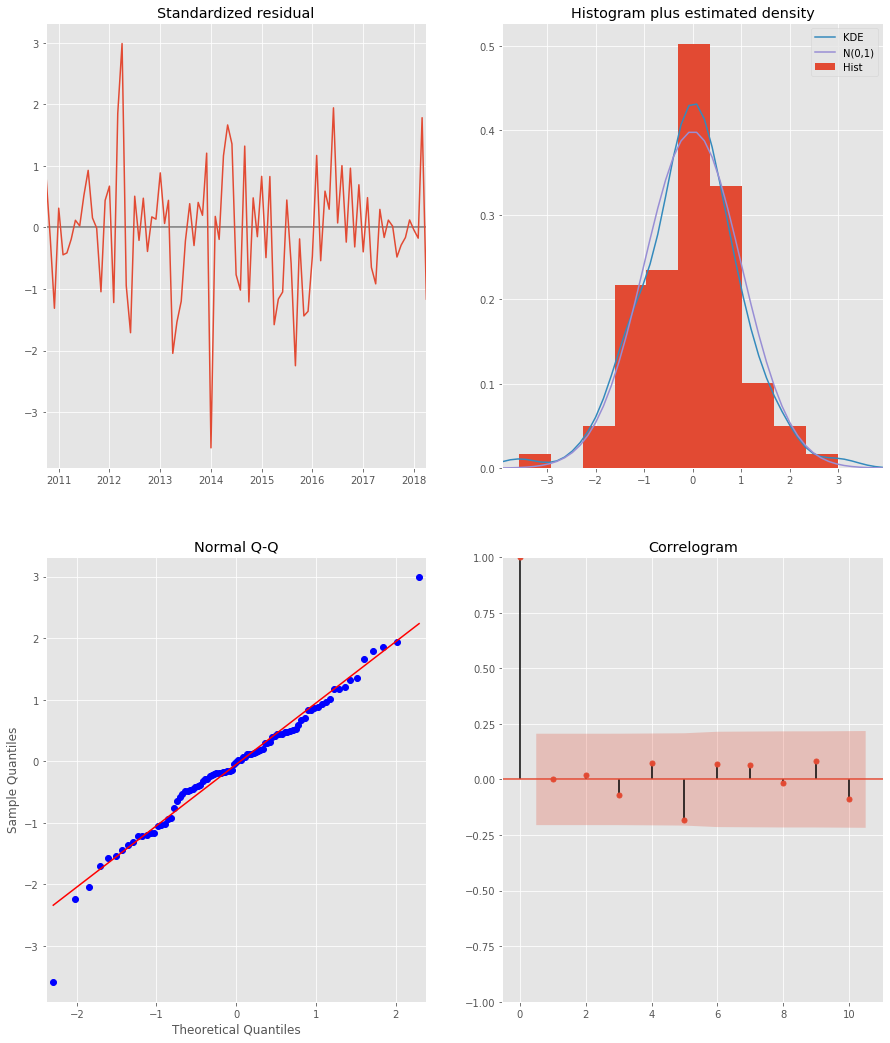

In [14]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [15]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()

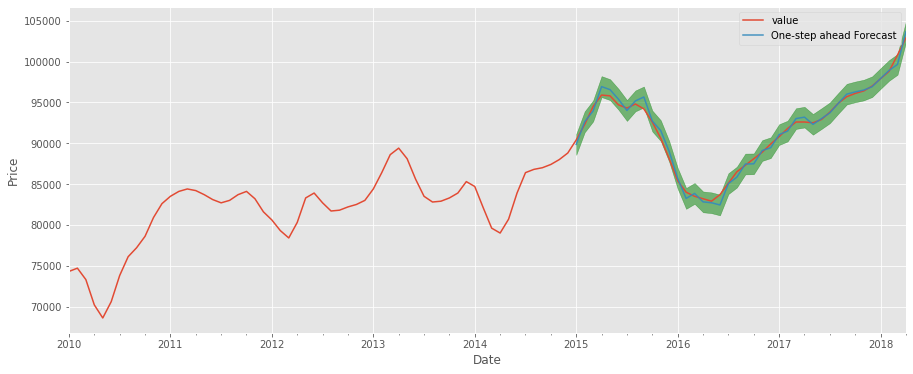

In [16]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [33]:
# pred.predicted_mean

In [17]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2015-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 576.28


## Dynamic Forecasting

In [28]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

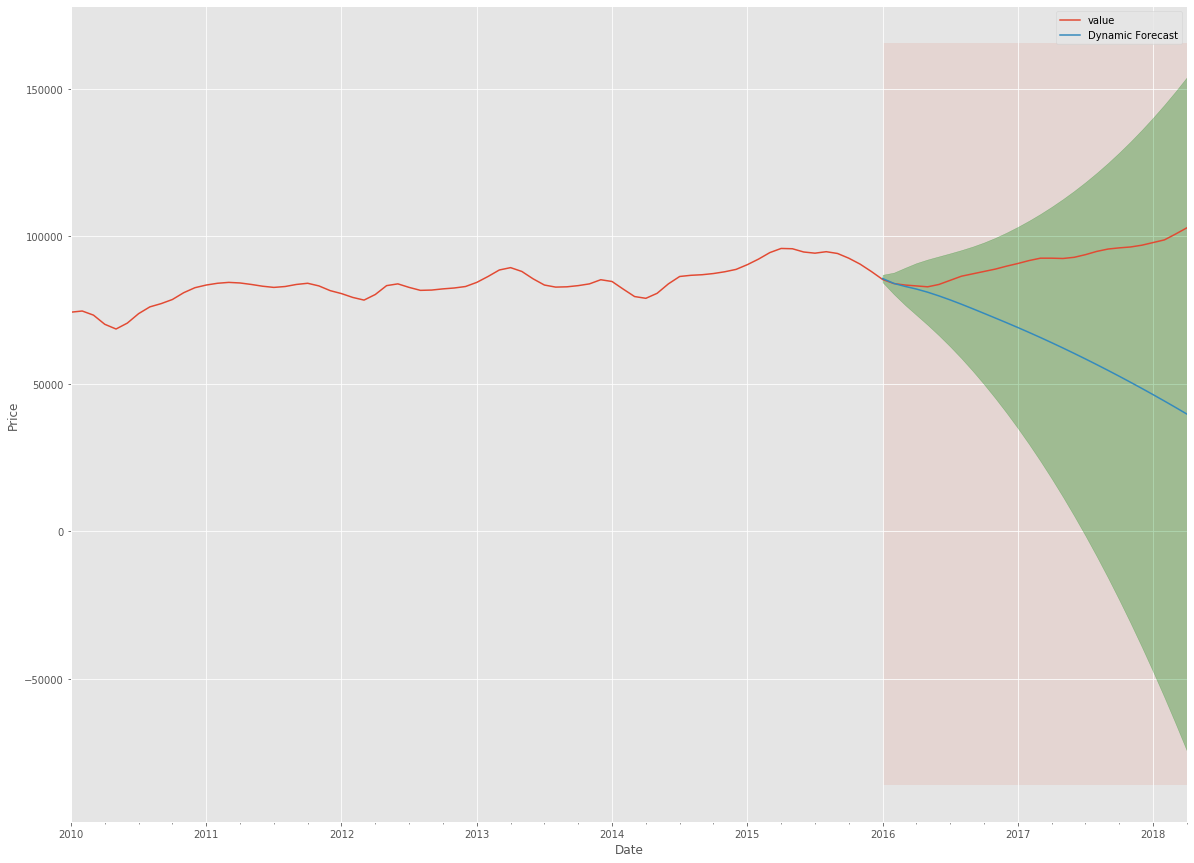

In [29]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [30]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 32501.97


In [27]:
# print(mse)

## Producing and visualising forecasts

In [31]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

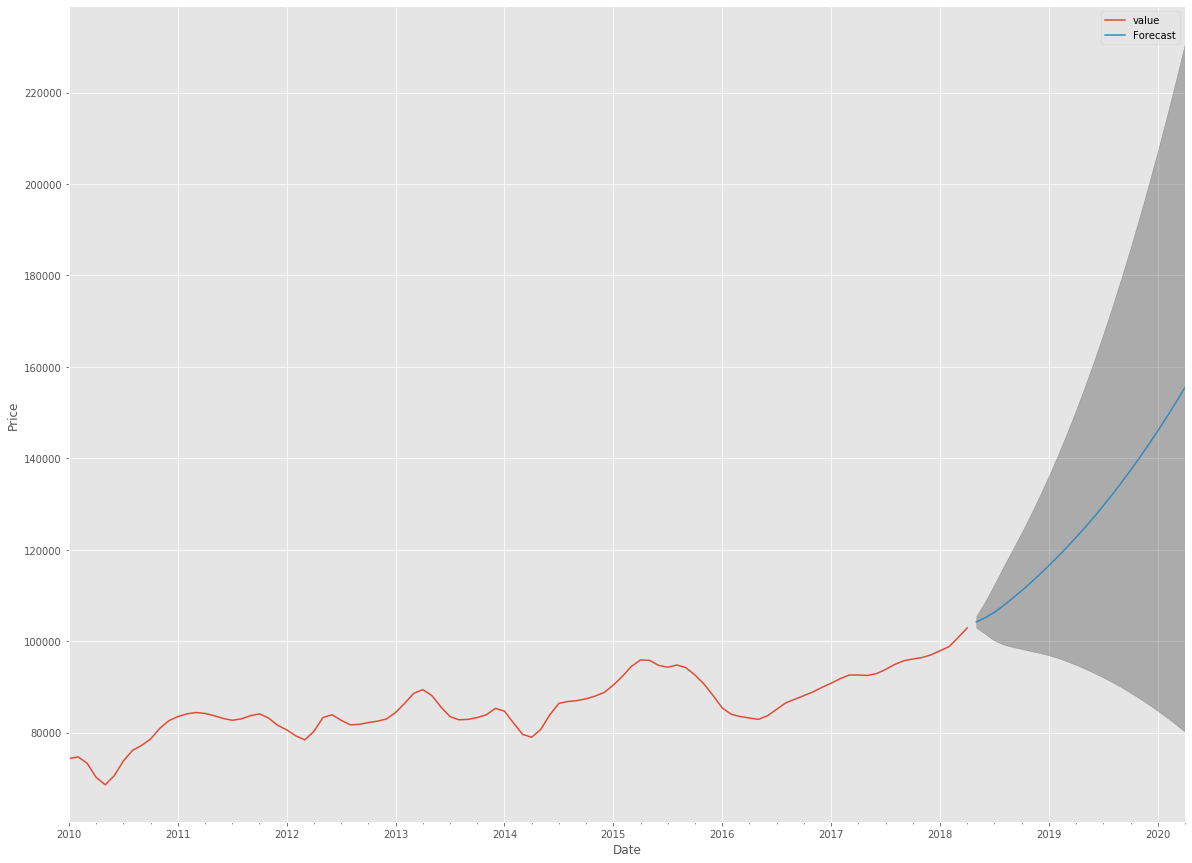

In [32]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [37]:
# predicted value on Jan 1st 2020?
prediction.predicted_mean['2020-01-01']

145971.68270652628

In [38]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.491028
